<a href="https://colab.research.google.com/github/ruchikakhemka/MachineLearning/blob/master/DecisionTrees_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries
import pandas as pd #Data Processing
import numpy as np #Linear Algebra
from sklearn import tree
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.tree import DecisionTreeClassifier

In [2]:

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Loading Titanic dataset
data_dir = "/content/drive/My Drive/Titanic_dataset"
train_file = data_dir + "/train.csv"
test_file = data_dir + "/test.csv"

#Read Data
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
pd.set_option('display.max_columns', None)
print(train_data.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [4]:
print(train_data.shape)

(891, 12)


In [5]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#Preprocessing Data in columns Cabin, Ticket, Name
#check for missing values
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

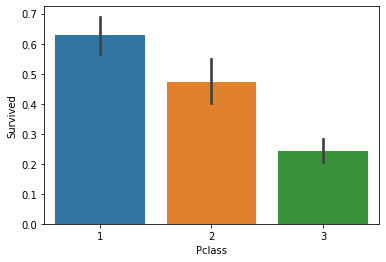

In [8]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

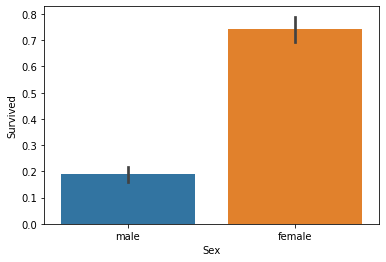

In [9]:
sns.barplot(x='Sex', y='Survived', data=train_data) #Following bar plot will show that survival rate of women is far higher than Men

In [0]:
#Dropping PassengerId from taining set as the id is not contributing much for the prediction
train_data  = train_data.drop(['PassengerId'],axis=1)

In [11]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
deck = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
data = [train_data, test_data]
for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna("U0")
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck'] = dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)
print(dataset['Deck'][10:40])

10    0
11    0
12    2
13    0
14    5
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    2
25    0
26    2
27    0
28    1
29    0
30    0
31    0
32    0
33    0
34    3
35    0
36    0
37    0
38    0
39    0
Name: Deck, dtype: int64


In [0]:
#Creating New Features
for dataset in data:
  dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [0]:
#Dropping Cabin column from train and test data
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [0]:
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [16]:
#Handling missing value for Embarked Column
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
common_value = 'S'
for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
print(train_data['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          714 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     889 non-null object
Deck         891 non-null int64
Has_Cabin    891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [19]:
#Converting Fare column from Float to Int
data = [train_data, test_data]
for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)
print(train_data['Fare'])

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int64


In [0]:
#convert Embark feature to numeric value
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    

In [21]:

train_data['Embarked'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

In [22]:
#Handling missing values in Age
data = [train_data,test_data]
for dataset in data:
    mean = dataset['Age'].mean()
    std = dataset['Age'].std()
    null_count = dataset["Age"].isnull().sum()
    print(null_count)
    # compute random numbers between the mean, std and is_null
    rand_age_list = np.random.randint(mean - std, mean + std, size = null_count)
    # fill NaN values in Age column with random values generated
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = rand_age_list
    dataset['Age'] = dataset['Age'].astype(int)
    #print(dataset["Age"])
#print(train_data['Age'].dtype)
train_data["Age"].isnull().sum()
print(train_data["Age"])


177
86
0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    28
889    26
890    32
Name: Age, Length: 891, dtype: int64


In [23]:
#converting Sex feature values into numerical value 0 or 1
genders = {'male':0,'female':1}
data = [train_data, test_data]
for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)
print(train_data['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


In [24]:
train_data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [0]:
#Extracting title from Name column
data = [train_data, test_data]
titles = {"Mr":1,"Mrs":2,"Master":3,"Miss":4,"Rare":5}
#extracting title from Name
for dataset in data:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].map(titles)
  # filling NaN with 0, to get safe
  dataset['Title'] = dataset['Title'].fillna(0)

In [26]:
print(train_data['Title'].head(20))

0     1
1     2
2     4
3     2
4     1
5     1
6     1
7     3
8     2
9     2
10    4
11    4
12    1
13    1
14    4
15    2
16    3
17    1
18    2
19    2
Name: Title, dtype: int64


In [0]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [0]:
#Dropping name column from train and test dataset
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [0]:
#creating categories
data = [train_data,test_data]
for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

  #Mapping Fare
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
  dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)



In [30]:
train_data['Age'].head()

0    2
1    5
2    3
3    5
4    5
Name: Age, dtype: int64

In [31]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Has_Cabin,Title
0,0,3,0,2,1,0,0,0.0,0,1,1
1,1,1,1,5,1,0,3,1.0,3,1,2
2,1,3,1,3,0,0,0,0.0,0,1,4
3,1,1,1,5,1,0,3,0.0,3,1,2
4,0,3,0,5,0,0,1,0.0,0,1,1


In [0]:
data = [train_data,test_data]
for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(0).astype(int)


In [35]:
# Visualizing Data
# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
           mean count  sum
Title                     
1      0.156673   517   81
2      0.793651   126  100
3      0.575000    40   23
4      0.702703   185  130
5      0.347826    23    8

In [37]:
#statistics to get how many males vs Females survived 
# gender_mapping = {'female': 0, 'male': 1} 
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
         mean count  sum
Sex                     
0    0.188908   577  109
1    0.742038   314  233

In [0]:
#Building Machine Learning Model
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

In [0]:
#Criterion for Information Gain can be set using entropy as value, another criterion supported by deciion tree is Gini Index
decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)


In [44]:
print(acc_decision_tree)

92.7
